**<h1><center>Lab-5-Report </center></h1>**

**<h1><center>EE5175: Image Signal Processing </center></h1>**


<h4><center>Under the guidence of </center></h4>
<h4><center>Prof. AN.Rajagopalan </center></h4>

<center>By EE21S048</center>

<h9>Date of submission: 05-03-2022<h9>

#**Space Varient Blur:**
---

**Import the Libraries:**

In [21]:
from numpy import *
import sys
import math
import cv2
import matplotlib.pyplot as plt

**Read the Images:**

195 195
256 256


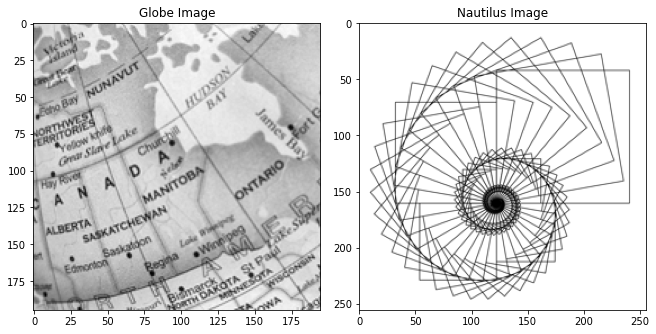

In [22]:
img= cv2.imread("Globe.png",0)
width, height= img.shape    #finding the no' of pixels in x axis and y axis of image1
print(width, height)

img2= cv2.imread("Nautilus.png",0)
width2,height2= img2.shape  #finding the no' of pixels in x axis and y axis of image1
print(width2, height2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img,'gray')                #displaying gray scale image
ax1.title.set_text("Globe Image")     #setting title to the figure
ax2.imshow(img2,'gray')       
ax2.title.set_text("Nautilus Image")

##**Space-variant Blur:**

Now assume the blur to be space-variant, i.e. the standard deviation varies for each pixel. 

Consider the distribution of σ to be

*   $σ(m, n) = A exp{−((m −N/2)^2+(n −N/2)^2)}/B, 0 ≤ m, n ≤ N − 1$ 
*   Given  
$σ(N/2,N/2)= 2.0$ and $σ(0, 0) = 0.01$

where N × N is size of the image and pixel indices are in the range [0, N −1]×[0, N −1].


**1.Find A and B, and create the matrix σ. Perform Gaussian blurring on Globe.pgm using the values of σ(m, n).**

In [23]:
N=width
A=2
B= N**2/(2*log(200))
print(A,B,N)

2 3588.403390110064 195


In [34]:
sigma_mat=zeros((N,N))
for i in range(N):
  for j in range(N):
    sigma_mat[i,j] = A*(exp(-((i-N/2)**2+(j-N/2)**2)/B))

**Determing Gaussian Kernel size:**

*   Given the value of deviation of Gaussian blur kernel: σ
*   The Kernel size is given by  $(6σ+1)*(6σ+1)$ 

In [35]:
w = ceil(6*sigma_mat)
w[w % 2 == 0]+=1
w=w.astype(int)

**Construct the Gaussian Kernel:**

In Discrete approximation:


*   Gaussian Kernel h is defined as :
<center>$h(m,n)=1/(\sqrt{2\pi}\sigma^2)*e^{-(m^2+n^2)/(2\sigma^2)}$</center>

*   We normalise the kernel to make entries sum equal to 1 and define the normalised Gaussian Kernel as:
<center>$h(m,n)=1/(\sqrt{2\pi}σ^2sum)*e^{-(m^2+n^2)/(2\sigma^2)}$</center>

 

*   where 'Sum' is the sum of all the elements of gaussian kernel.
 <center>$sum=\sum_{m,n=-t}^{\ m,n=t} h(m,n) = 1$</center>


**2D Convolution:** 

In the digital domain, convolution is performed by multiplying and accumulating the instantaneous values of the overlapping samples corresponding to two input signals, one of which is flipped.  

In [36]:
max_w = amax(w)                           # get the maximum window size
t= max_w//2

img_padded=zeros((width+2*t, height+2*t)) #Padding for convolution
img_padded[t:-t,t:-t]=img

target_img=zeros((width, height))         # create the canvas of zeros for the final image
target=zeros((width+2*t, height+2*t))

for i in range(t, width+t):
    for j in range(t, height+t):
      
        # get the appropriate sigma value and image intensity
        sigma = sigma_mat[i-t, j-t]

        k_size=w[i-t, j-t]
        kernel=zeros([k_size,k_size])
        t1=k_size//2                                         
        const=1/(2*pi*sigma**2)
        for p in range(k_size):
          for q in range(k_size):
            kernel[p,q]=const*exp((-(p-t1)**2-(q-t1)**2)/(2*(sigma**2)))     #Building Gaussian blur kernel
        kernel=kernel/sum(kernel)                                            #normalizing the values of kernel to sum upto 1

        target[i-t1:i+t1+1, j-t1:j+t1+1] += img[i-t, j-t]*kernel
# return the canvas by cropping out the zero padded regions
target_img=target[t:-t, t:-t]

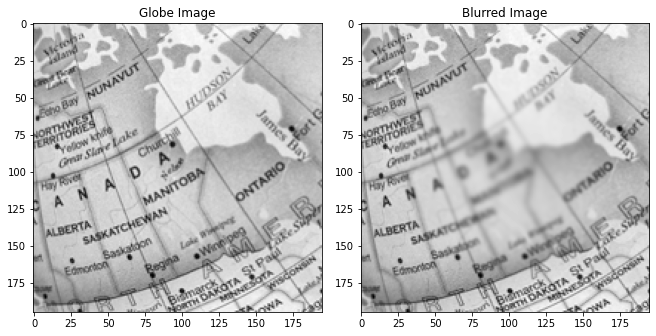

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img,'gray')                #displaying gray scale image
ax1.title.set_text("Globe Image")  #setting title to the figure
ax2.imshow(target_img,'gray')       
ax2.title.set_text("Blurred Image")

**2. Blur Nautilus.pgm using**

(a) space-invariant blur code of part 1 with σ = 1.0, and

(b) space-variant blur code of part 2 with σ(m, n) = 1.0 for 0 ≤ m, n ≤ N − 1.

Verify that the blurred images of the above two steps are same.


**Space-variant blur**

In [42]:
sigma = 1.0
sigma_mat= sigma*ones((width2, height2), dtype=float)   # constant blur matrix
w =7 
t= w//2

img_padded=zeros((width2+2*t, height2+2*t))
img_padded[t:-t,t:-t]=img2

In [43]:
target_img=zeros((width2, height2))        # create the canvas of zeros for the final image
target=zeros((width2+2*t, height2+2*t))

for i in range(t, width2+t):
    for j in range(t, height2+t):
      
        # get the appropriate sigma value and image intensity
        sigma = sigma_mat[i-t, j-t]

        k_size=7
        kernel=zeros([k_size,k_size])
        t1=k_size//2                                         
        const=1/(2*pi*sigma**2)
        for p in range(k_size):
          for q in range(k_size):
            kernel[p,q]=const*exp((-(p-t1)**2-(q-t1)**2)/(2*(sigma**2)))     #Building Gaussian blur kernel
        kernel=kernel/sum(kernel)                                          #normalizing the values of kernel to sum upto 1

        target[i-t1:i+t1+1, j-t1:j+t1+1] += img2[i-t, j-t]*kernel
# return the canvas by cropping out the zero padded regions
target_img=target[t:-t, t:-t]

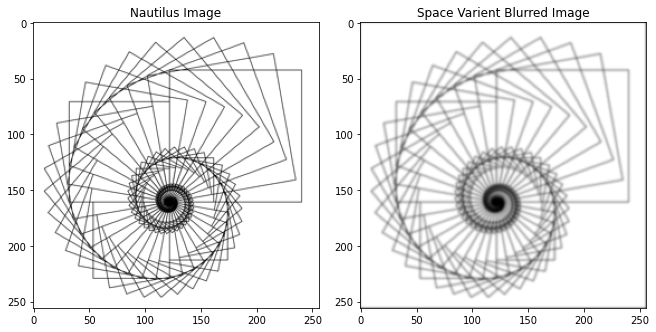

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img2,'gray')                #displaying gray scale image
ax1.title.set_text("Nautilus Image")   #setting title to the figure
ax2.imshow(target_img,'gray')       
ax2.title.set_text("Space Varient Blurred Image")

**Space-Invariant Blur**

In [45]:
sigma=1
k_size=7
kernel=zeros([k_size,k_size])
t=k_size//2                                         
const=1/(2*pi*sigma**2)
for p in range(k_size):
  for q in range(k_size):
    kernel[p,q]=const*exp((-(p-t)**2-(q-t)**2)/(2*(sigma**2)))     #Building Gaussian blur kernel
kernel=kernel/sum(kernel)              

In [46]:
op_img=zeros([width2,height2])                     #op_img is the target or output image
for x in range(t,width2+t):                       #traversing from t to width+t on padded image
  for y in range(t,height2+t):                    #traversing from t to height+t on padded image
    op=0                                         #setting sum of output pixel to 0
    for i in range(k_size):                      #traversing through the kernel 
      for j in range(k_size):
        op+=kernel[i,j]*img_padded[x-t+i,y-t+j]  #multiplying and summing up the values
    op_img[x-t,y-t]=op 

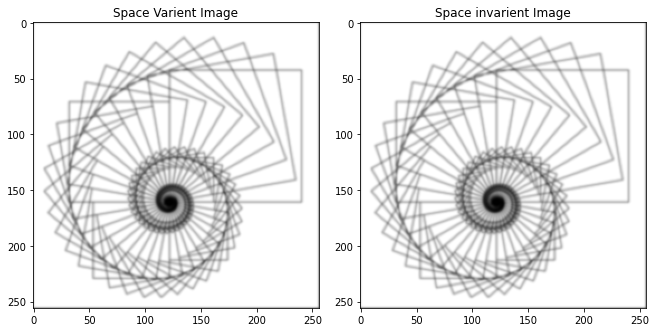

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(target_img,'gray')                #displaying gray scale image
ax1.title.set_text("Space Varient Image")    #setting title to the figure
ax2.imshow(op_img,'gray')       
ax2.title.set_text("Space invarient Image")

In [52]:
diff=abs(op_img-target_img)
diff

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

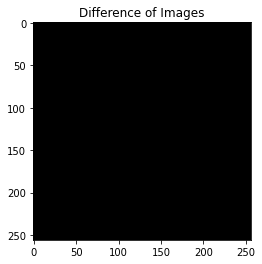

In [55]:
plt.imshow(diff,"gray")
plt.title("Difference of Images")
plt.show()

##**Conclusion:**


1.   The central region of the globe image looks more blurred.

 This is because the values of sigma in 
sigma matrix are high at the center compared to remaining pixels.
1.   After performing Space variant and invariant blur on image2 we can see that the difference between space variant and invariant blurred images is zero.
2.  The Gaussian Kernel needs to be calculated for each pixel in space variant blur which needs to be done only only for the space invariant blur case. 
Therefore Space varying blur is computationally intensive process than space in-varying blur. 

We can conclude that space invariant blur is a special case of space varying blur.

